# Outlier Detection comparison
from: http://scikit-learn.org/dev/auto_examples/plot_anomaly_comparison.html




In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

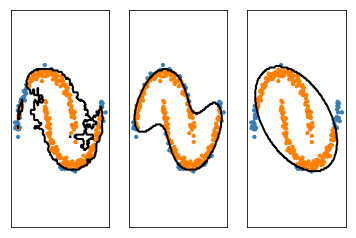

'\nblobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)\ndatasets = [\n    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,\n               **blobs_params)[0],\n    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],\n               **blobs_params)[0],\n    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -\n          np.array([0.5, 0.25])),\n    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]\n    '

In [24]:
#settings
n_samples = 300
outliers_fraction = .15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

#different methods of anomaly detection

isolation_forest = IsolationForest(contamination = outliers_fraction, random_state = 42)

oc_svm = svm.OneClassSVM(nu = outliers_fraction, kernel = 'rbf', gamma = 0.1)

data_set = 4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))

elliptical_covariance = EllipticEnvelope(contamination=outliers_fraction)

algos = [isolation_forest, oc_svm,elliptical_covariance]

plot_idx = 1

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

for algo in algos:
    
    algo.fit(data_set)

    plt.subplot(1, len(algos),plot_idx)
    

    
    y_preds = algo.fit(data_set).predict(data_set)
    
    Z = algo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(data_set[:, 0], data_set[:, 1], s=10, color=colors[(y_preds + 1) // 2])

    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks(())
    plt.yticks(())

    plot_idx += 1

plt.show()

